**Registro Clínicos de insuficiência cardiáca**



*  data set contém um conjunto de características 

  que podem ser usadas para prever a mortalidade por

  insuficiência cardíaca.







In [2]:
#importando Bibliotecas 
import tensorflow as tf
from tensorflow import keras

#bibliotecas auxiliares
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#importando base de dados
fashion_mnist = keras.datasets.fashion_mnist

#**Organizando base de dados**

In [5]:

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


 

*   Os arrays train_images e train_labels são o conjunto de treinamento: os dados do modelo usado para aprender
*   O modelo é testado com o conjunto de teste, os arrays test_images e test_labels





In [6]:
train_images.shape

(60000, 28, 28)

Com o comando shape podemos ver que existem 60000 imagens no conjunto de treinameto, e cada imagem é representada em 28 x 28 pixels.

In [7]:
len(train_labels)


60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

existem 60000 labels no conjunto de treinamento, cada label é um inteiro de 0 á 9

In [9]:
test_images.shape

(10000, 28, 28)

Existem 10000 imagens no conjnto de teste, cada imagem é representada por 28 x 28 pixels

In [10]:
len(test_labels)

10000

No conjunto de teste contem 10000 labels das imagens

#**Re-escala dos Dados**

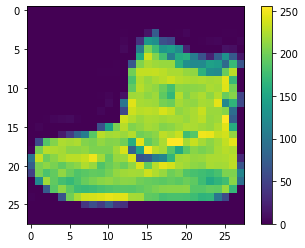

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Exibindo a primeira imagem do conjunto de treinamento podemos ver que os valores dos pixels estão divididos entre 0 e 255

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0


Escalonaremos esse valores entre 1 e 0 dividindo os valores por 255, tanto o conjunto de teste como o treinamento.

#**Definindo o CNN**

* Para construir o modelo requer configurar as camadas do modelo, e depois compilar o modelo.

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

* A primeira camada transforma para um array de uma dimensão
* A segunda camda tem 128 nós
* Terceira camada retorna um array com 10 probabilidades

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* Função Loss mede quão precisa o modelo é durante o treinamento.

* Optimizer é como o modelo se atualiza com base no dado que ele vê na função loss.

* Métrics é usadas para monitorar os passos de treinamento e teste. 

# **Treinando o modelo**

* Treinando o modelo com o método model.fit

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4995 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3756 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3378 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3142 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2823 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2685 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2577 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2477 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

À medida que o modelo treina, as métricas loss e acurácia são mostradas.

###**Avaliando a Acurácia**

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nAcurácia do conjunto de teste:', test_acc)

313/313 - 0s - loss: 0.3311 - accuracy: 0.8797

Acurácia do conjunto de teste: 0.8797000050544739


A Acurácia do conjunto de teste foi bem melhor em relação a do conjunto de treino, chegando a cem por cento

In [17]:
classificação = model.predict(test_images)

# **Avaliação do modelo**

In [19]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3311 - accuracy: 0.8797


[0.3311351239681244, 0.8797000050544739]

Com método evaluete temos a acurácia das imagens e labels, podemos ver que os valores de treino e testes se mantiveram em ambas as análise
